# Parsing

In the previous session, we had mentioned that there are three broad levels of syntactic processing:

    Part-of-speech tagging

    Constituency parsing

    Dependency parsing
 

You have studied POS tagging in detail, though that is not enough for understanding the complex grammatical structures and ambiguities in sentences which most human languages comprise of.

 

Therefore, we need to learn techniques which can help us understand the grammatical structures of complex sentences. Constituency parsing and dependency parsing can help us achieve that.

 

In This Session
In this session, you'll study parsing techniques and algorithms to understand the grammatical structure of sentences. In constituency parsing, you will learn to parse complex sentences using what are called grammar rules. You'll also study an alternative parsing technique called dependency parsing. 

 

Topics covered in this session include:

    Constituency Parsing

    Context Free Grammar (CFG)

    Bottom-up and top-down parsing algorithms

    Probabilistic CFG, or PCFG

    Dependency Parsing

    Fixed and free word order languages

    Elements of dependency grammar 

    Overview of dependency parsing algorithms


Note that dependency parsing is a recent topic in the field of NLP whose study involves a fairly deep understanding of the English grammar and parsing algorithms, which is not possible to cover in the span of this course. However, in this session, we'll cover the basics of dependency parsing techniques which should enable you to consume more sophisticated texts on the topic and introduce you to such additional resources for further study.

 

## Why Shallow Parsing is Not Sufficient

Shallow parsing, as the name implies, refers to fairly shallow levels of parsing such as POS tagging, chunking, etc. (you will learn chunking in the next session). But such techniques would not be able to check the grammatical structure of the sentence, i.e. whether a sentence is grammatically correct, or understand the dependencies between words in a sentence.

 

Let's see why deeper parsing techniques are required.

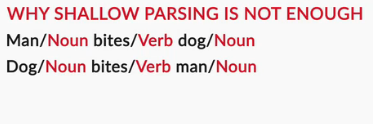

Dog and Man have same POS .

Thus, POS tagging will although help us identify the linguistic role of the word in a sentence, it wouldn't enable us to understand how these words are related to each other in a sentence.

 

In the next few segments, you'll learn about constituency and dependency parsers.

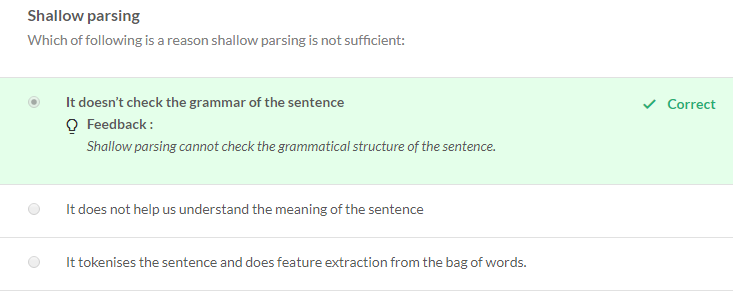

## Constituency Grammars

To deal with the complexity and ambiguity of natural language, we first need to identify and define commonly observed grammatical patterns. 

 

The first step in understanding grammar is to divide a sentence into groups of words called constituents based on their grammatical role in the sentence.

 

To start with, let's take an example sentence: “The fox  ate the squirrel.”

 

Each underlined group of words represents a grammatical unit or a constituent - "The fox" represents a noun phrase, "ate" represents a verb phrase, "the squirrel" is another noun phrase.

 

In the upcoming few lectures, you will study how constituency parsers can 'parse' the grammatical structure of sentences. Let's first understand the concept of constituents.

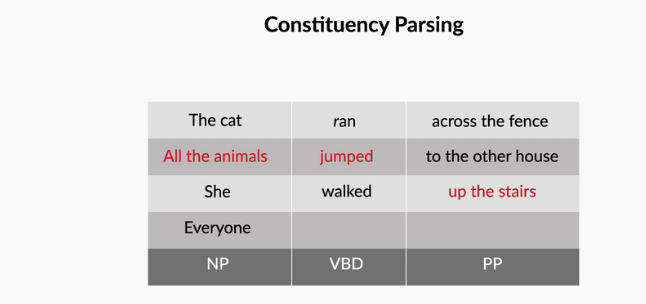

Let's understand the concept of constituencies in a little more detail. Consider the following two sentences:

'Ram   read   an article on data science'

'Shruti   ate   dinner'
 

The underlined groups of words form a constituent (or a phrase). The rationale for clubbing these words in a single unit is provided by the notion of substitutability, i.e., a constituent can be replaced with another equivalent constituent while keeping the sentence syntactically valid.

 

For example, replacing the constituency 'an article on data science' (a noun phrase) with 'dinner' (another noun phrase) doesn't affect the syntax of the sentence, though the resultant sentence "Ram read dinner" is semantically meaningless.

 

Most common constituencies in English are Noun Phrases (NP), Verb Phrases (VP), and Prepositional Phrases (PP). The following table summarises these phrases:

 

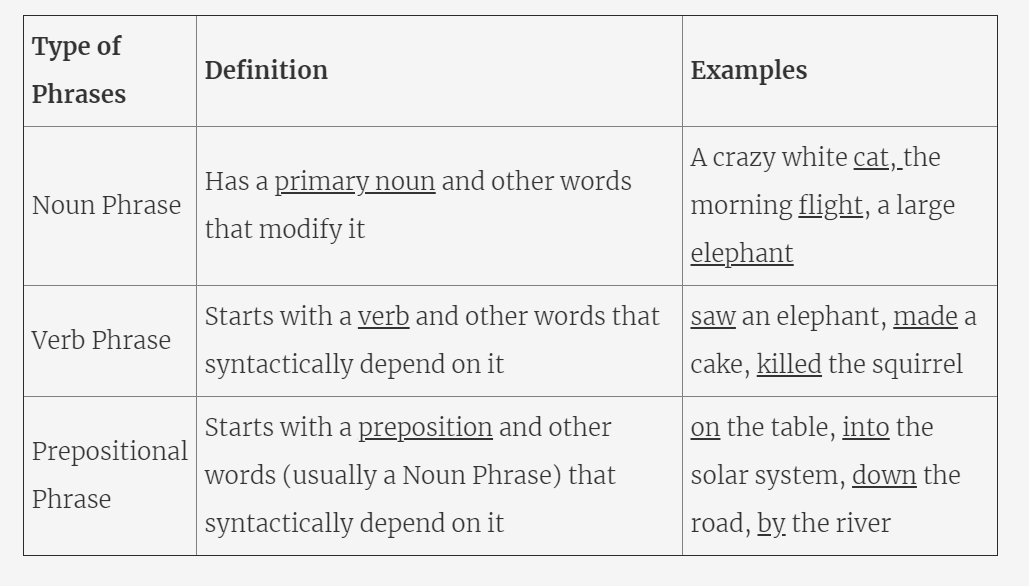

There are various other types of phrases, such as an adverbial phrase, a nominal (N), etc., though in most cases you will need to work with only the above three phrases along with the nominal (introduced in a later lecture).

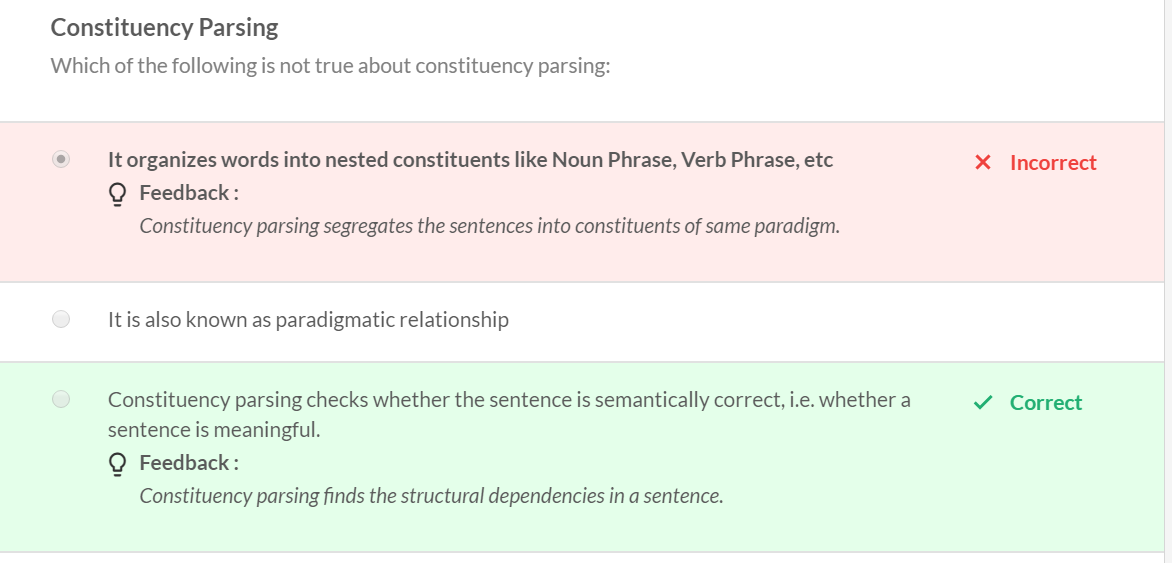

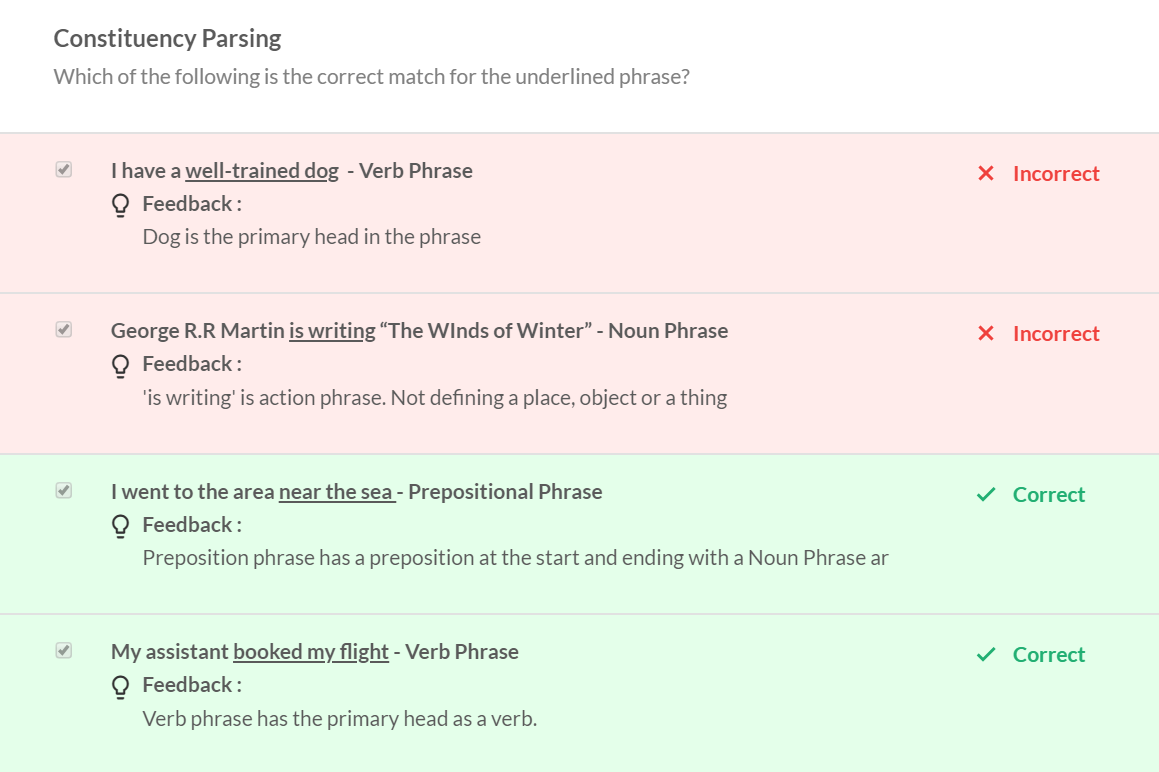

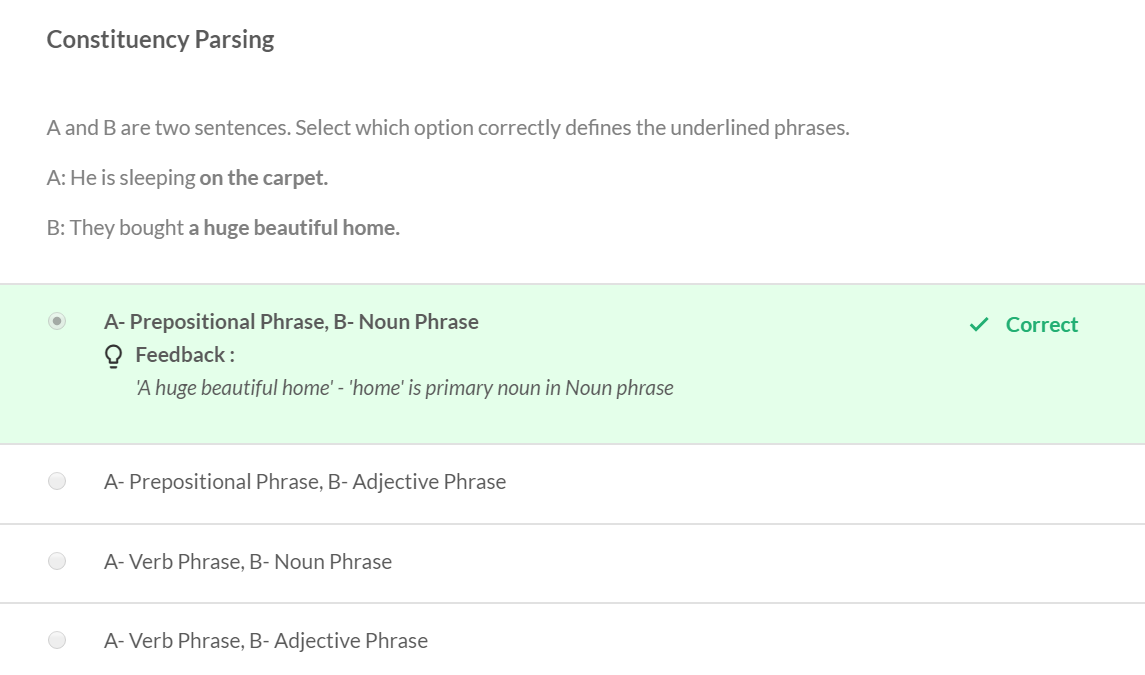

## Context-Free Grammars

The most commonly used technique to organize sentences into constituencies is Context-Free Grammars or CFGs. CFGs define a set of grammar rules (or productions) which specify how words can be grouped to form constituents such as noun phrases, verb phrases, etc.

 

In the following lecture, the professor will explain the elements of a context-free grammar.

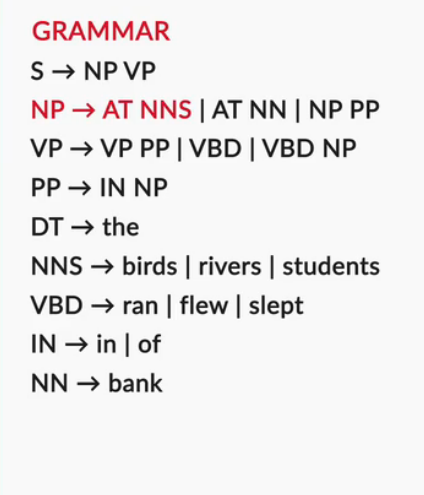

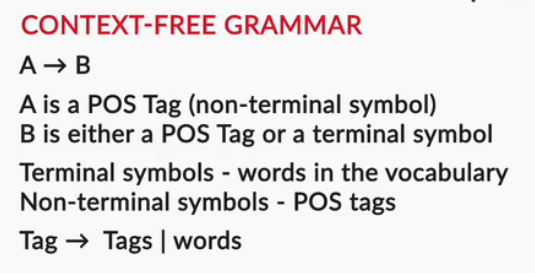

It is called CFG because the left hand side of the rule is not dependent on the context it appears 

To summarise, a context-free grammar is a series of production rules. Let’s understand production rules using some examples. The following production rule says that a noun phrase can be formed using either a determiner (DT) followed by a noun (N) or a noun phrase (NP) followed by a prepositional phrase (PP). :

 

NP -> DT N | NP PP

 

Some example phrases that follow this production rule are:

The/DT man/N
The/DT man/N over/P the/DT bridge/N
 

Both of the above are noun phrases NP. The man is a noun phrase that follows the first rule:

NP -> DT N.

 

The second phrase (The man  over the bridge) follows the second rule:

NP -> NP PP

 

It has a noun phrase (The man) and a prepositional phrase (over the bridge).

 

In this way, using grammar rules, you can parse sentences into different constituents. In general, any production rule can be written as A -> B C, where A is a non-terminal symbol (NP, VP, N etc.) and B and C are either non-terminals or terminal symbols (i.e. words in vocabulary such as flight, man etc.). 

 

Some other examples of commonly observed production rules in English grammar are provided in the table below. Note that a nominal (Nom) refers to an entity such as morning, flight etc. which commonly follows the rule Nominal > Nominal Noun. There is a subtle difference and a significant overlap between a nominal (Nom) and a noun (NN), you may read more about it here, though you need not worry much about these nuances in this course.

 

The symbol S represents an entire sentence.

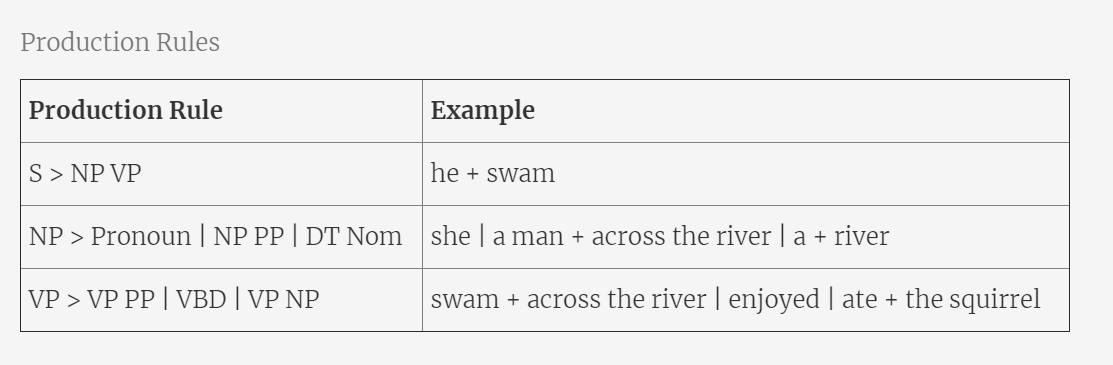

Further, the professor mentioned two broad approaches for parsing sentences using CFGs:

    1.Top-down: Start from the starting symbol S and produce each word in the sentence

    2.Bottom-up: Start from the individual words and reduce them to the sentence S

You’ll learn both approaches in detail in the next segments.


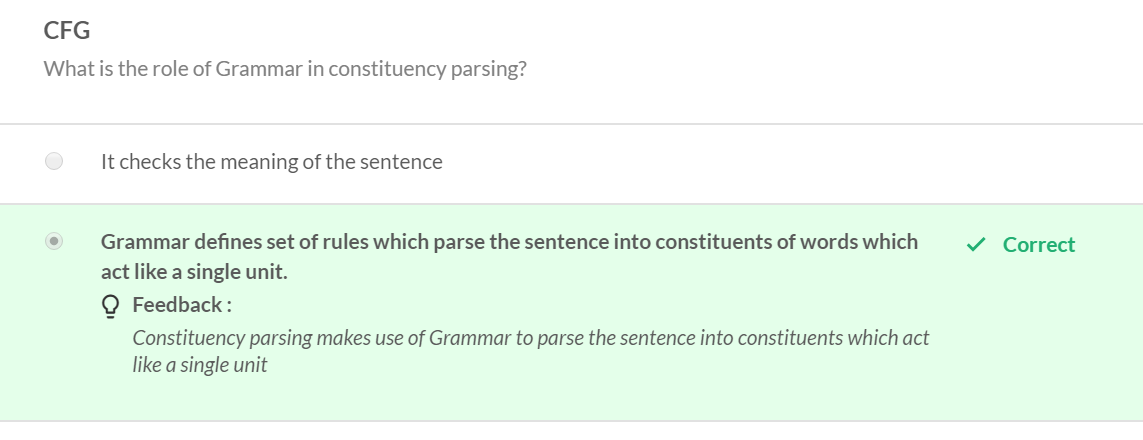

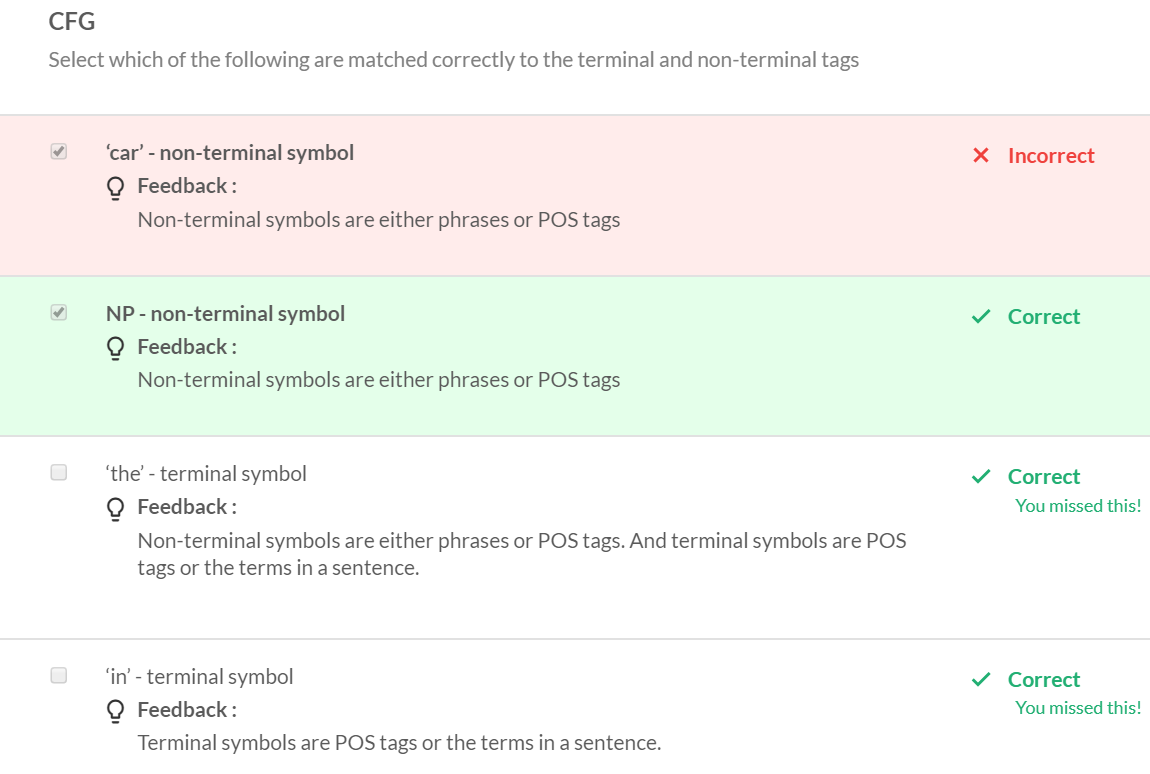

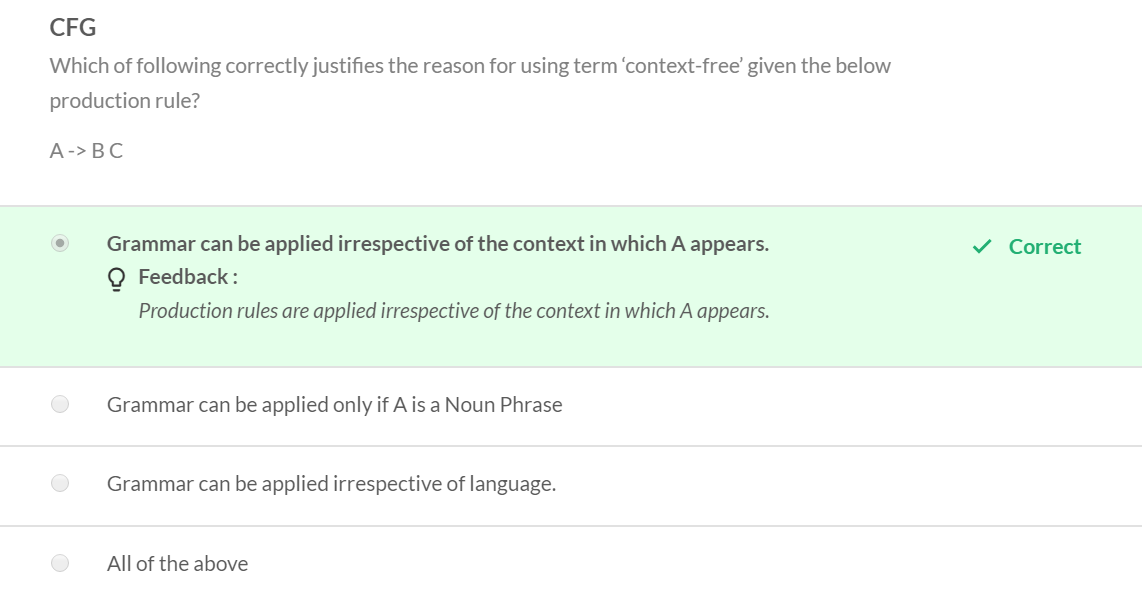

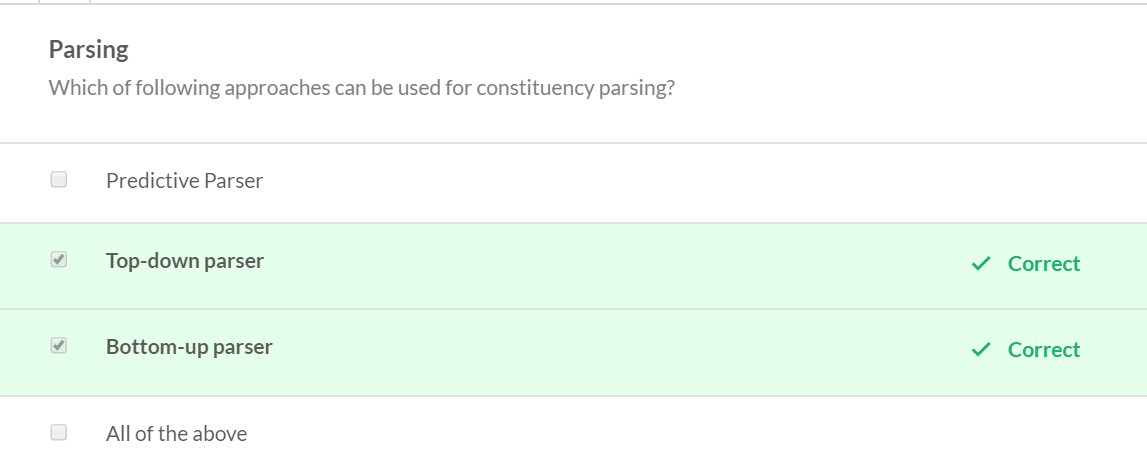

## Top-Down Parsing

Until now, you have learnt about the basics of phrases, CFGs and how CFGs can be used for parsing sentences. Let's now study algorithms for parsing. There are two broad approaches for parsing:

Top-down: Start from the starting symbol S and produce each word in the sentence

Bottom-up: Start from the individual words and reduce them to the sentence S

 

You have studied that CFGs define what are called grammar or production rules of the form A > BC. Both parsing techniques use these rules to create parse trees. 

 

Let's first study top-down parsing.

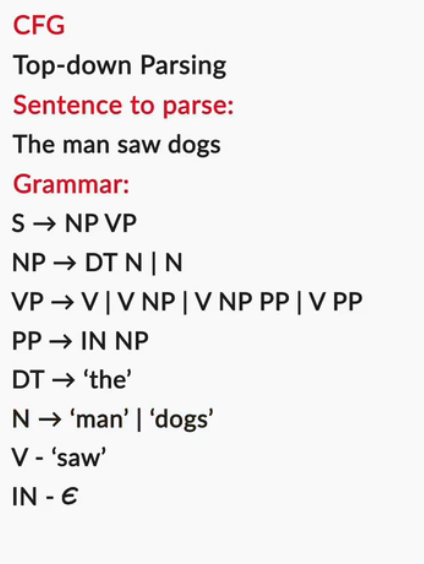

Top-down parsing starts with the start symbol S at the top and uses the production rules to parse each word one by one. You continue to parse until all the words have been allocated to some production rule. 

 

The figure below shows all the paths the parser tried for parsing "The man saw dogs".

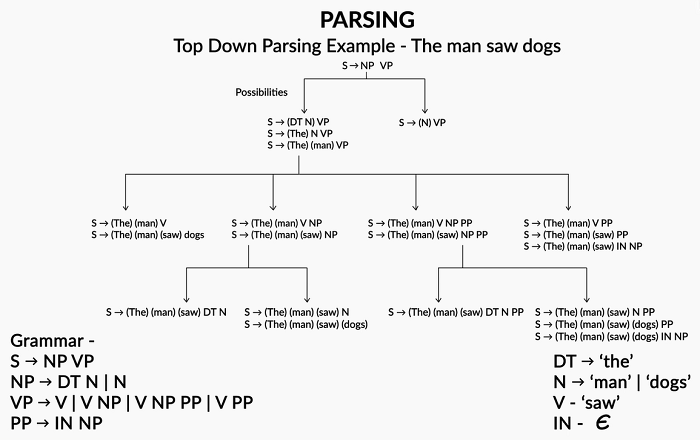

                                    Top down Parsed Tree

 

In the process, you often encounter dead ends, i.e. points where no production rule can be applied to produce a right-hand side from the left-hand side. In such cases, the algorithm needs to backtrack and try some other rule.

 

Let's understand this through an example of a simple sentence and production rules.

 

Sentence: The man slept

Grammar:

S -> NP VP

NP -> N| Det N

VP -> V | V NP

Det -> ‘the’

N -> ‘man’

V -> ‘slept’

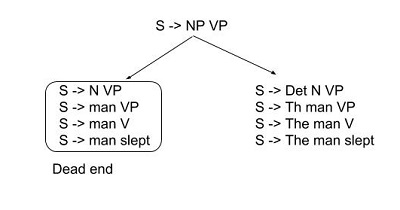

                                            Top down Parsing

The sentence couldn’t be parsed using the left side of the tree since it reached a dead end. On the other hand, the grammar used on the right side is able to parse the sentence completely.

 

The NLTK library in Python will show the parse tree as:

 

(S

            (NP (DT The) (N man))

            (VP (V slept)))

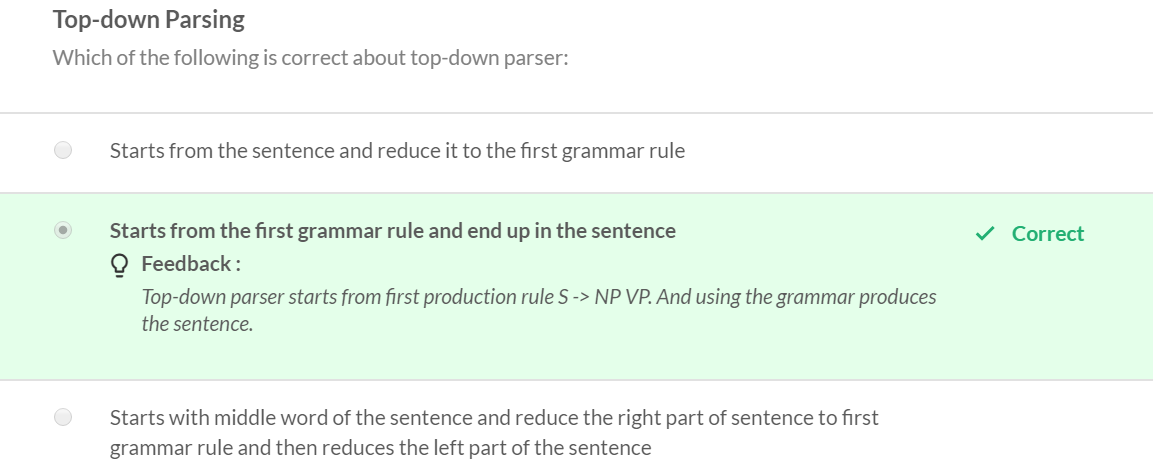

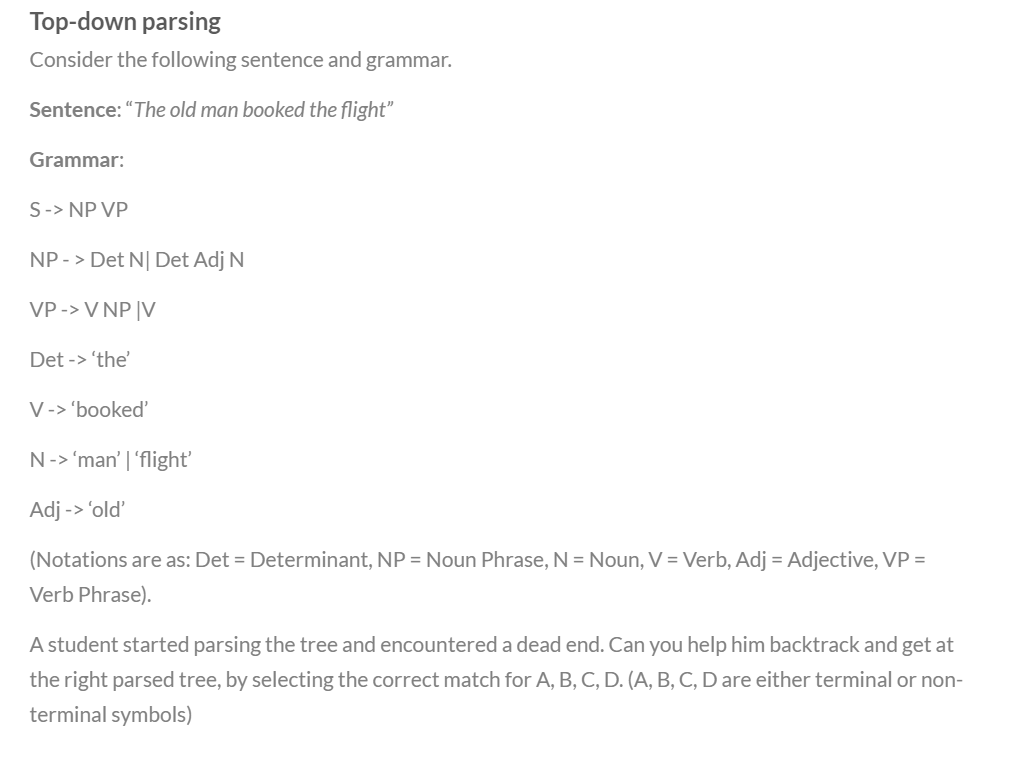

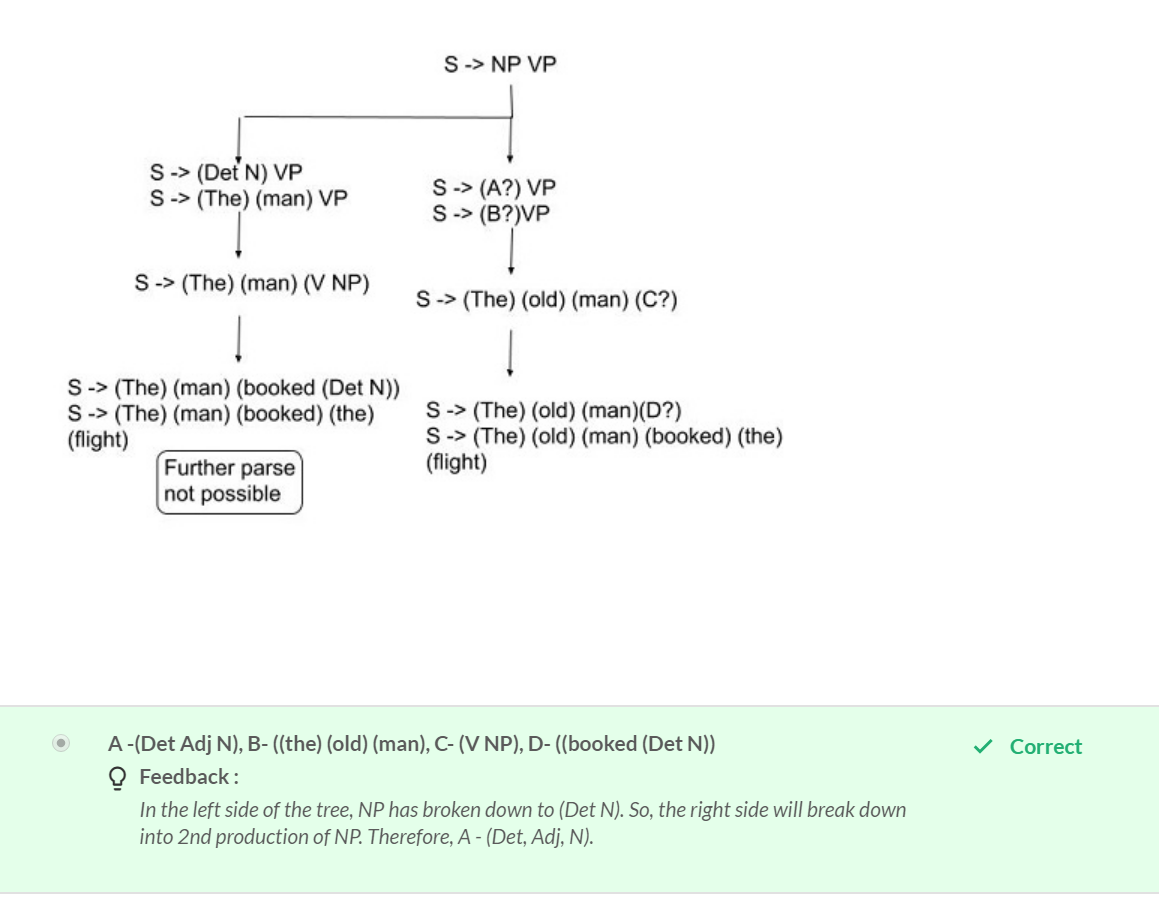

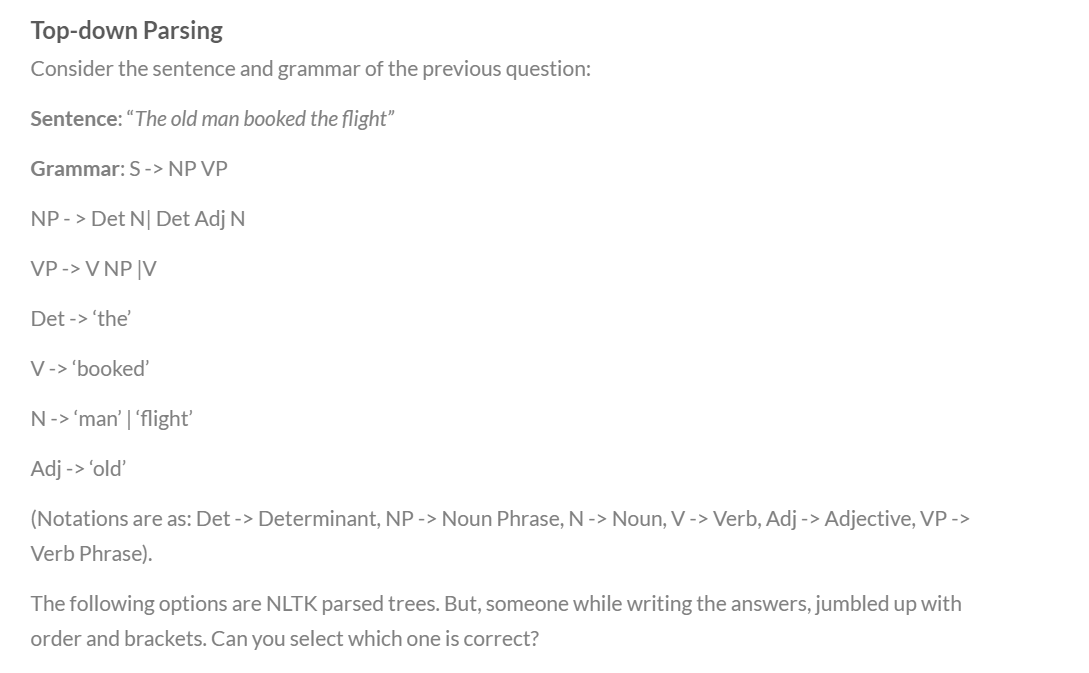

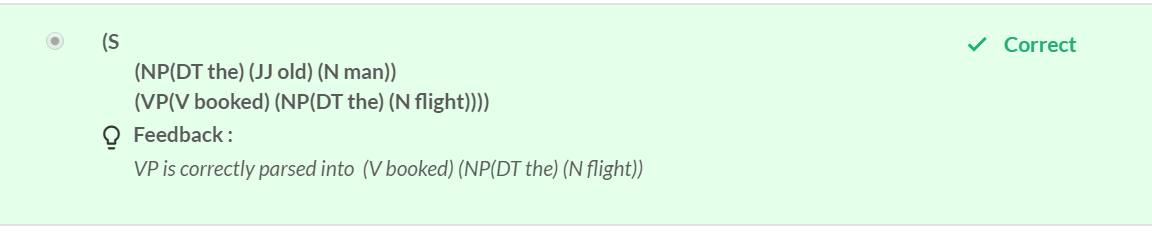

You learnt how to parse a sentence in the previous lecture. But top-down parsers have a specific limitation. In the next lecture, the professor will explain where the top-down parser fails.

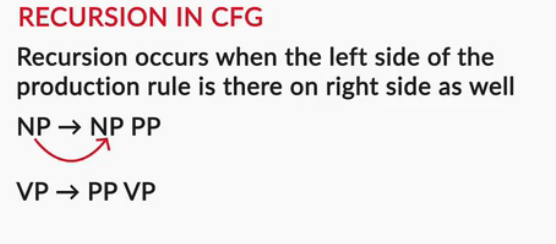



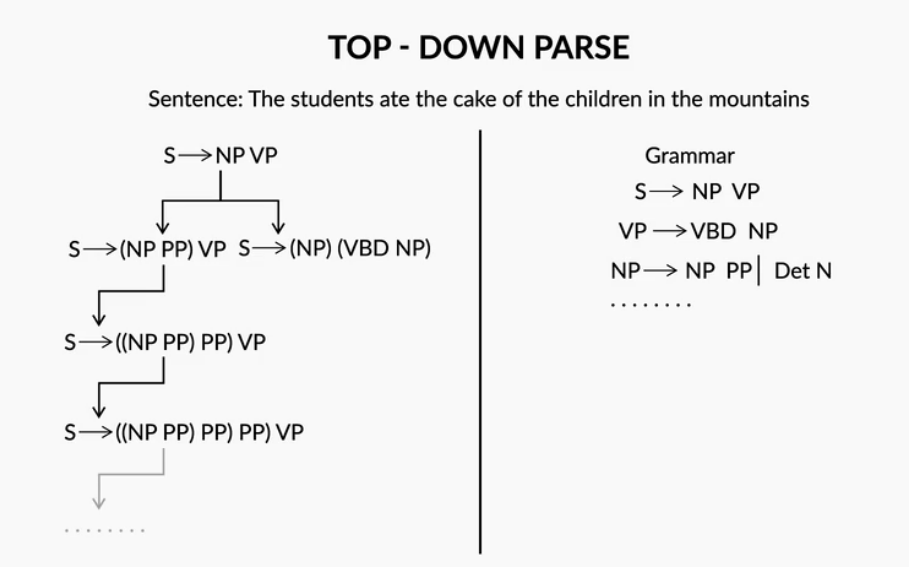

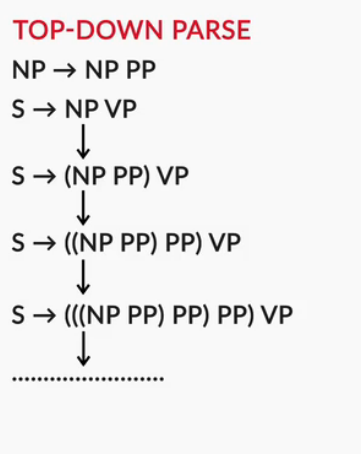

Note that the recursive descent parser is a type of top-down parser, though the terms are sometimes used equivalently. You can read more about the recursive descent parser in the additional reading material below.

 

Let’s understand the problem of left-recursion using an example:

Sentence: The man saw a car.

Grammar:

S -> NP VP

NP -> DT N

VP -> VP NP| V

DT -> the

N -> man

 

The top-down parse structure of the sentence will look as follows:

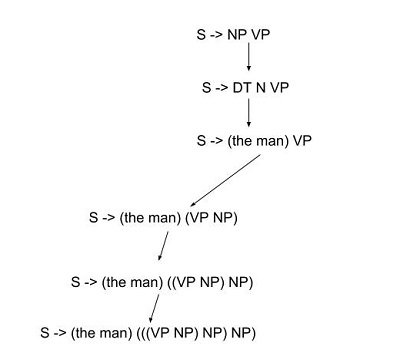

The rule VP -> VP NP runs into an infinite loop and no parse tree will be obtained. This is the problem of left recursion. This problem can be resolved using the bottom-up approach, which you'll learn in the next segment. 

 

For now, let's look at Python implementation of the top-down Parse tree. The following Jupyter notebook is attached for your reference.

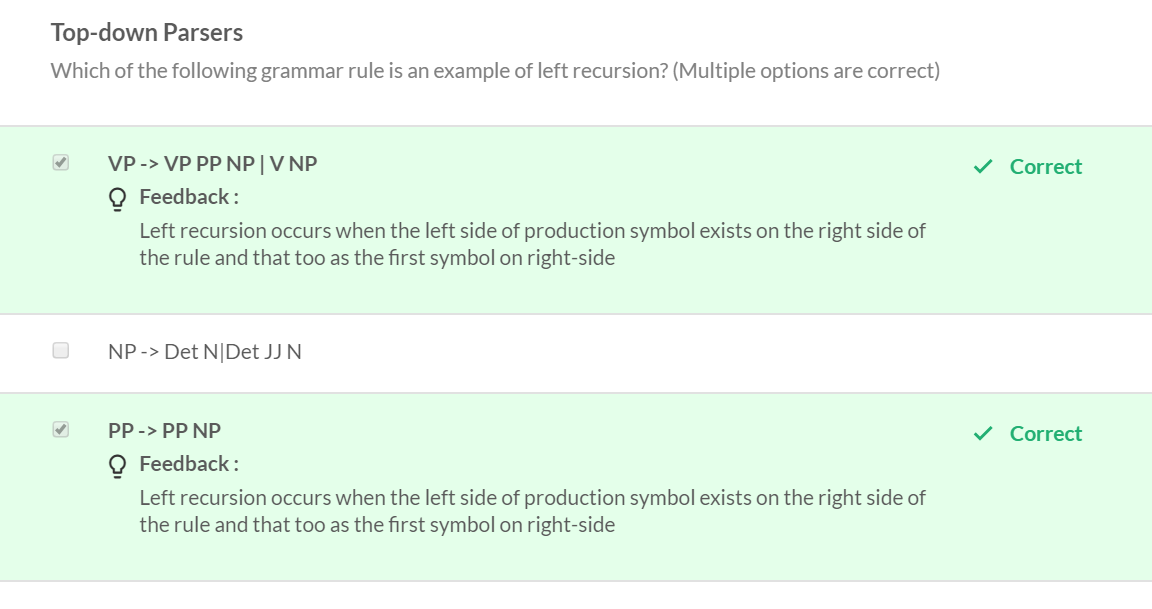

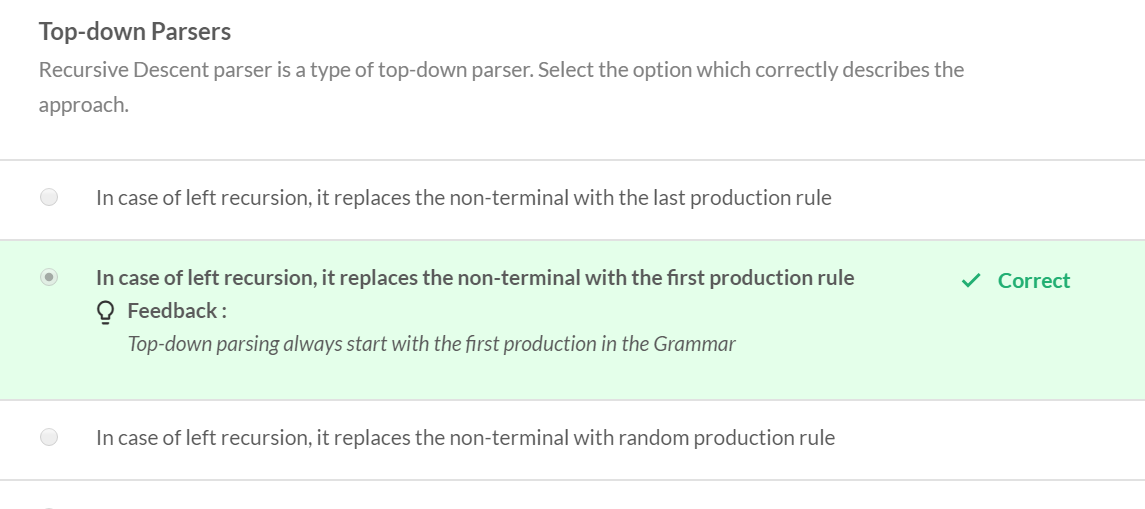

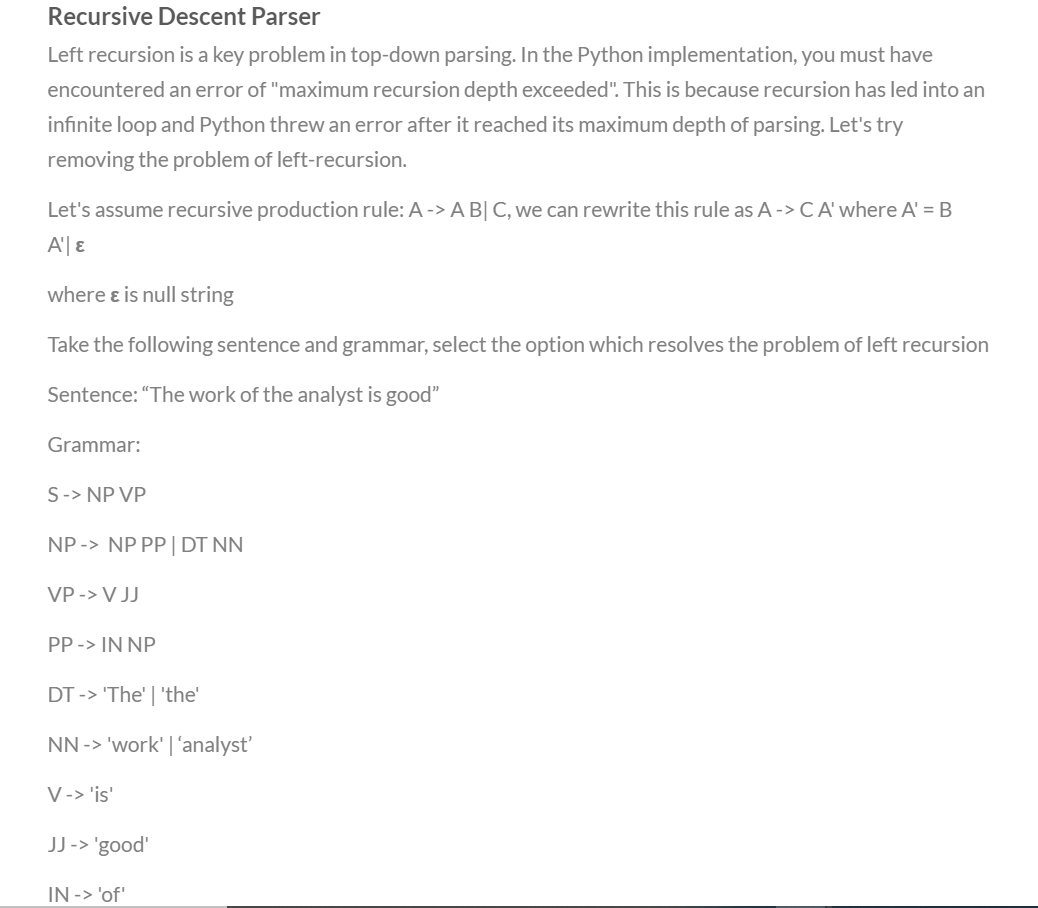

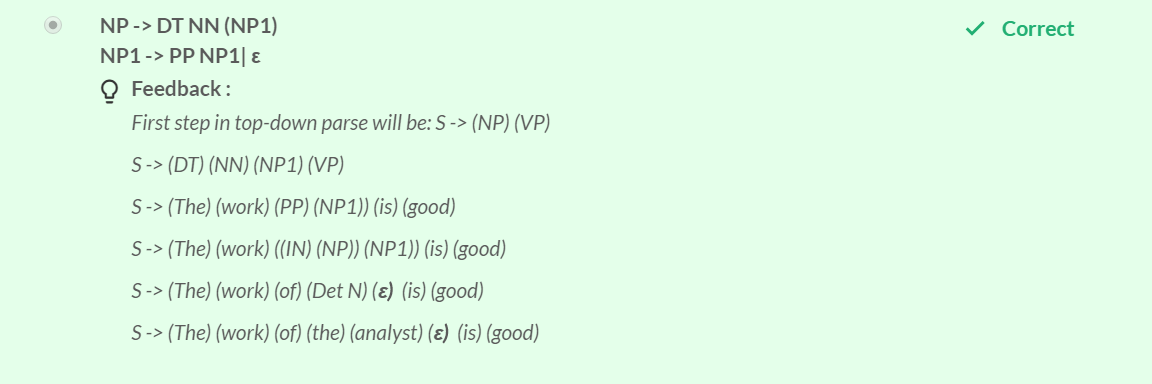

Additional Reading

Although the naive implementation of the recursive descent parser suffers from the problem of left-recursion, alternate algorithms have been suggested which can handle this problem. The algorithms use predictive techniques to 'look ahead' and avoid going down the infinite loop. Read more about it here. (https://en.wikipedia.org/wiki/Recursive_descent_parser)

Refer 3. Top+Down_Parsing.pynb